In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import PIL
import itertools as it
import urllib, io
import log
import math

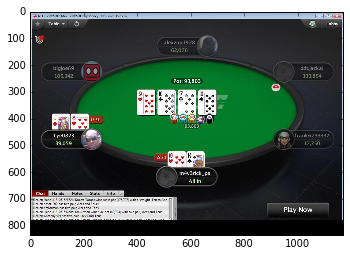

In [85]:
# f = io.BytesIO(urllib.urlopen('http://10.1.1.66:9000/windows/461550').read())
# f = open('tables/004.jpeg')
table = Image.open('tables/003.jpeg')

plt.imshow(table)

In [14]:
def draw_images(images, labels=None, num_cols=None, num_rows=None, cmap=None):
    if num_cols is None:
        num_cols = len(images)
    if num_rows is None:
        num_rows = len(images) / num_cols
    width, height = 2 * num_cols, 3 * num_rows
    fig = plt.figure(figsize=(width, height))
    
    items = list(enumerate(images))
    items = items[:int(num_rows*num_cols)]
    
    for i, image in items:
        data = np.asarray(image)

        ax = fig.add_subplot(num_rows, num_cols, i+1)

        ax.imshow(data, cmap=cmap)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        if labels is not None:
            if len(labels) == len(images):
                label = labels[i]
            else:
                label = labels
            ax.text(0, 0, label, bbox={'facecolor':'white', 'pad':5}, fontdict={'size':14, 'weight':'bold'})

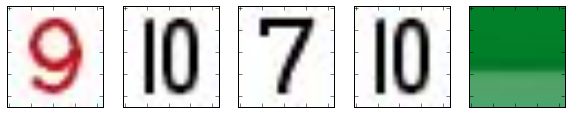

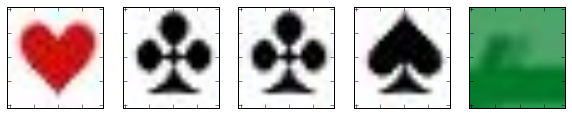

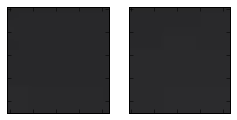

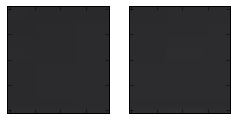

In [86]:
def crop(canvas, offset, size):
    (offset_x, offset_y) = offset
    (width, height) = size
    return canvas.crop((offset_x, offset_y, offset_x + width, offset_y + height))

def suit(canvas):
    offset = (2, 27)
    size = (20, 21)
    return crop(canvas, offset, size)

def rank(canvas):
    offset = (2, 5)
    size = (22, 23)
    return crop(canvas, offset, size)

def card(canvas, idx, padding):
    width = 70
    size = (width, 95)
    offset = ((width + padding) * idx, 0)
    return crop(canvas, offset, size)

def board(table):
    offset = (399, 292)
    size = (400, 400)
    board_canvas = crop(table, offset, size)
    cards = [card(board_canvas, idx, padding = 6) for idx in range(0, 5)]
    ranks_suits = [(rank(card), suit(card)) for card in cards]
    return zip(*ranks_suits)

def hand(table):
    offset = (513, 42)
    size = (400, 400)
    hand_canvas = crop(table, offset, size)
    cards = [card(hand_canvas, idx, padding = 0) for idx in range(0, 2)]
    ranks_suits = [(rank(card), suit(card)) for card in cards]
    return zip(*ranks_suits)

(board_ranks, board_suits) = board(table)
(hand_ranks, hand_suits) = hand(table)

draw_images(board_ranks)
draw_images(board_suits)
draw_images(hand_ranks)
draw_images(hand_suits)